In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from collections import defaultdict
from collections import defaultdict
import os
import pandas as pd

In [2]:
p01 = np.load("/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p01_done.npy")

In [3]:
df = pd.read_csv('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/sensor_meta_feature.csv' , sep ="\t")

In [4]:
nan_analysis = df.isna().sum().to_frame(name='NaN_Count')
nan_analysis['NaN_Percentage'] = (df.isna().mean() * 100).round(2)
print(nan_analysis)

                      NaN_Count  NaN_Percentage
Unnamed: 0                    0            0.00
Fwy                           0            0.00
District                      0            0.00
County                        0            0.00
City                       5007           29.50
Abs PM                        0            0.00
Length                     6354           37.44
station_id                    0            0.00
Name                          7            0.04
Type                          0            0.00
Sensor Type                4064           23.95
HOV                           0            0.00
Road Width                  833            4.91
Lane Width                  833            4.91
Inner Shoulder Width        833            4.91
Outer Shoulder Width        833            4.91
Design Speed Limit          833            4.91
Inner Median Type           833            4.91
Inner Median Width          833            4.91
Terrain                     833         

In [8]:
p01.shape

(8928, 16972, 3)

In [11]:
p01 = p01.reshape(31 , 288, 16972, 3)

In [12]:
len(np.unique(p01[:, :, 42, :], axis=0))

7

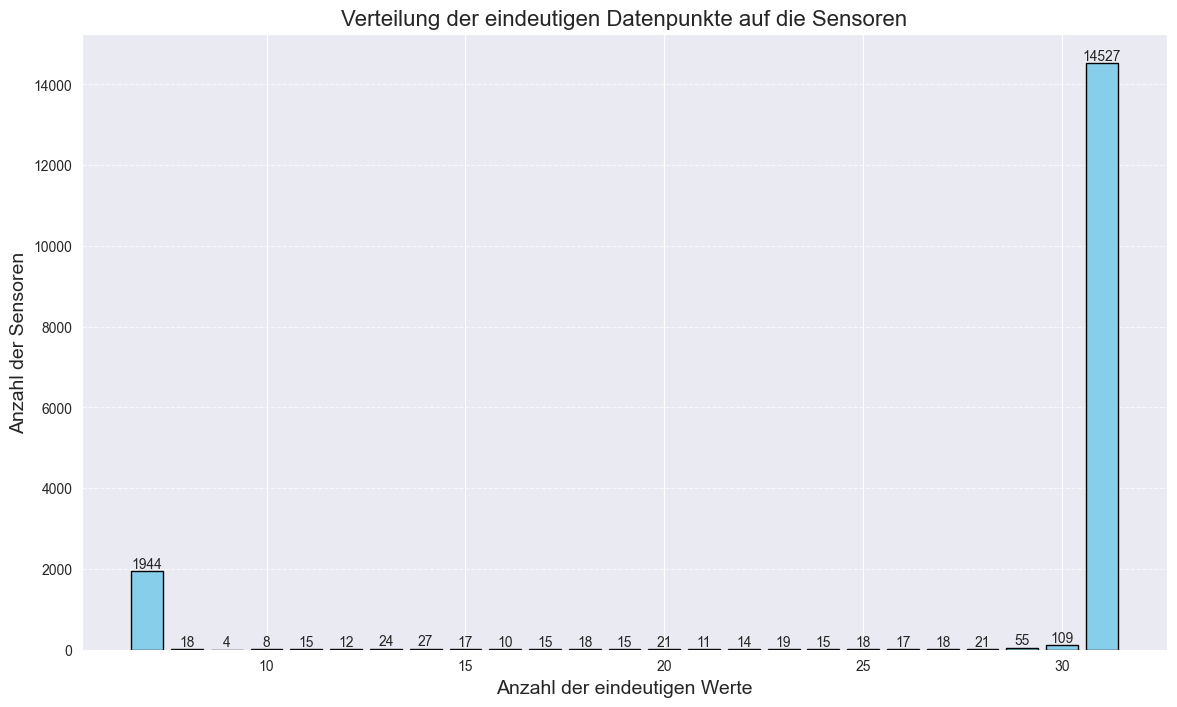

In [13]:
# Assuming p01 is already reshaped to (31, 288, 16972, 3)
unique_data_counts = [len(np.unique(p01[:, :, sensor_id, :], axis=0)) for sensor_id in range(p01.shape[2])]

# Count how many sensors have each unique data count
unique_data_distribution = Counter(unique_data_counts)

# Sort the counts for a better-ordered bar chart
x_values = sorted(unique_data_distribution.keys())
y_values = [unique_data_distribution[count] for count in x_values]

# Plot the results as a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(x_values, y_values, color='skyblue', edgecolor='black')

# Add labels and title with increased font size
plt.xlabel("Anzahl der eindeutigen Werte", fontsize=14)
plt.ylabel("Anzahl der Sensoren", fontsize=14)
plt.title("Verteilung der eindeutigen Datenpunkte auf die Sensoren", fontsize=16)

# Add data labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

# Add a grid for the y-axis with a lighter style
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/Datenpunkte02.svg')

plt.show()

In [75]:
# Beispiel: Liste von Tupeln erstellen (Sensor-ID, Anzahl eindeutiger Werte)    
sensor_unique_data = [(sensor_id, unique_data_counts[sensor_id]) for sensor_id in range(len(unique_data_counts))]

In [76]:
np.save('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/unique/sensor_unique_data_05.npy', sensor_unique_data)

In [3]:
# Funktion zum Bereinigen der Duplikate in einem 3D-Array
def remove_duplicate_sensors(data):
    duplicate_sensors_all_dims = set()

    # Gehe durch jede Dimension (0, 1, 2)
    for dim in range(data.shape[2]):
        dim_data = data[:, :, dim]
        duplicate_sensors = defaultdict(list)

        # Finde duplizierte Sensoren in der aktuellen Dimension
        for sensor_idx in range(dim_data.shape[1]):
            sensor_values = tuple(dim_data[:, sensor_idx])
            duplicate_sensors[sensor_values].append(sensor_idx)

        # Füge nur duplizierte Sensor-Indizes hinzu
        duplicate_sensors = {key: indices for key, indices in duplicate_sensors.items() if len(indices) > 1}
        for indices in duplicate_sensors.values():
            duplicate_sensors_all_dims.update(indices)

    # Entferne die duplizierten Sensoren-Spalten aus dem Array
    duplicate_sensors_all_dims = sorted(duplicate_sensors_all_dims)
    cleaned_data = np.delete(data, duplicate_sensors_all_dims, axis=1)
    return cleaned_data

In [7]:
# Basisverzeichnis für die Dateien
base_dir = "/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive"
output_dir = "/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/p_cleaned"

# Liste der Dateinamen, jetzt als relative Pfade innerhalb des Basisverzeichnisses
file_names = [
    'p01_done.npy', 'p02_done.npy', 'p03_done.npy', 'p04_done.npy', 
    'p05_done.npy', 'p06_done.npy', 'p07_done.npy', 'p08_done.npy', 
    'p09_done.npy', 'p10_done.npy', 'p11_done.npy', 'p12_done.npy'
]

In [14]:
coloums = np.load('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/node_order.npy')

In [9]:
# Verarbeite jede Datei
for file_name in file_names:
    # Erstelle den vollständigen Pfad zur Datei
    file_path = os.path.join(base_dir, file_name)

    # Überprüfe, ob die Datei existiert
    if os.path.exists(file_path):
        # Lade die Datei
        data = np.load(file_path)

        # Bereinige die Daten von Duplikaten
        cleaned_data = remove_duplicate_sensors(data)

        print(f"Form der bereinigten Daten: {cleaned_data.shape}")
        
        # Speichere die bereinigte Datei im Zielverzeichnis mit "_bereinigt" Suffix
        output_path = os.path.join(output_dir, f"{os.path.splitext(file_name)[0]}_bereinigt.npy")
        np.save(output_path, cleaned_data)

        # Bestätigungsausgabe
        print(f"{file_name} wurde bereinigt und als '{output_path}' gespeichert.")
    else:
        print(f"{file_name} existiert nicht und wurde übersprungen.")

(8928, 15043, 3)
/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p01_done.npy wurde bereinigt und als '/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p01_done_bereinigt.npy' gespeichert.
(8064, 15075, 3)
/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p02_done.npy wurde bereinigt und als '/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p02_done_bereinigt.npy' gespeichert.
(8928, 16972, 3)
/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p03_done.npy wurde bereinigt und als '/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p03_done_bereinigt.npy' gespeichert.
(8640, 15065, 3)
/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p04_done.npy wurde bereinigt und als '/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p04_done_bereinigt.npy' gespeichert.
(8928, 14980, 3)
/Users/bugragorkem/Desktop/Uni/